In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df_deliveries=pd.read_csv('ipl/deliveries.csv')
df_matches=pd.read_csv('ipl/matches.csv')

In [3]:
(df_deliveries.head())




,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
(df_matches.head())

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
print(df_deliveries.describe())
print('\n')
print(df_matches.describe())
print('\n')

            match_id         inning           over           ball  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean      318.281317       1.482188      10.142649       3.616483   
std       182.955531       0.501768       5.674338       1.807698   
min         1.000000       1.000000       1.000000       1.000000   
25%       161.000000       1.000000       5.000000       2.000000   
50%       319.000000       1.000000      10.000000       4.000000   
75%       476.000000       2.000000      15.000000       5.000000   
max       636.000000       4.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean        0.000538       0.037498       0.004885       0.022232   
std         0.023196       0.257398       0.114234       0.200104   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [6]:
print(df_deliveries.info())
print('\n')
print(df_matches.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

heck For Null Values :

In [7]:
print('Null Values Of Matches Dataframe : \n',df_matches.isnull().sum())
print('\n')
print('Null Values Of Deliveries Dataframe : \n',df_deliveries.isnull().sum())

Null Values Of Matches Dataframe : 
 id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64


Null Values Of Deliveries Dataframe : 
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_d

In [8]:
print(df_matches['umpire3'].unique())
print(df_matches['umpire3'].nunique(dropna=False))
df2=df_matches.drop(['umpire3'],axis=1)

[nan]
1


In [9]:
print("Basic Overview Of Matches Dataset : \n")
print('Number Of Matches Played :',df_matches.shape[0])
print("Number Of Seasons Played : ",df_matches['season'].value_counts().nunique())
print("Top 10 Prominent Players of IPL : \n", df_matches['player_of_match'].value_counts()[:10])
print("Most Winning Team and Number Of Matches: \n",df_matches['winner'].value_counts())
print("Most Winning Team: \n",df_matches['winner'].value_counts().idxmax())
print("Player Of The Match & Number Of Matches : \n",df_matches['player_of_match'].value_counts())
print("Player Of The Match For Max . Matches : \n",df_matches['player_of_match'].value_counts().idxmax())

Basic Overview Of Matches Dataset : 

Number Of Matches Played : 636
Number Of Seasons Played :  7
Top 10 Prominent Players of IPL : 
 CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64
Most Winning Team and Number Of Matches: 
 Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64
Most Winning Team: 
 Mumbai Indians
Player Of The Match & Number Of Match

In [10]:
print('\n')
#Some Condtional Filtering :
big_margin=df_matches[(df_matches['win_by_runs']>=100) | (df_matches['win_by_wickets']>=8)]
print(big_margin.winner.value_counts())



Royal Challengers Bangalore    17
Kolkata Knight Riders          16
Delhi Daredevils               13
Rajasthan Royals               12
Mumbai Indians                 12
Chennai Super Kings             9
Kings XI Punjab                 7
Sunrisers Hyderabad             5
Deccan Chargers                 2
Kochi Tuskers Kerala            2
Rising Pune Supergiant          1
Rising Pune Supergiants         1
Name: winner, dtype: int64


In [11]:
print("Number Of Seasons Played IN Different Cities : \n",df_matches.groupby('city')['season'].nunique())
print("Number Of Winners In Different Cities \n",df_matches.groupby('city')['winner'].nunique())
print("Winners in Cities \n",df_matches.groupby('city')['winner'].value_counts())

Number Of Seasons Played IN Different Cities : 
 city
Abu Dhabi         1
Ahmedabad         3
Bangalore         9
Bloemfontein      1
Cape Town         1
Centurion         1
Chandigarh        9
Chennai           6
Cuttack           3
Delhi             9
Dharamsala        4
Durban            1
East London       1
Hyderabad         8
Indore            2
Jaipur            5
Johannesburg      1
Kanpur            2
Kimberley         1
Kochi             1
Kolkata           9
Mumbai            9
Nagpur            1
Port Elizabeth    1
Pune              5
Raipur            3
Rajkot            2
Ranchi            3
Sharjah           1
Visakhapatnam     3
Name: season, dtype: int64
Number Of Winners In Different Cities 
 city
Abu Dhabi          4
Ahmedabad          6
Bangalore         11
Bloemfontein       2
Cape Town          6
Centurion          7
Chandigarh        10
Chennai            9
Cuttack            3
Delhi             13
Dharamsala         4
Durban             7
East London        3
H

In [12]:
print("Match where team won by highest runs",df_matches.iloc[df_matches['win_by_runs'].idxmax()])
print('\n')
print("Match where team won by highest wickets",df_matches.iloc[df_matches['win_by_wickets'].idxmax()])

Match where team won by highest runs id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


Match where team won by highest wickets id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1            

In [13]:
print("Basic Overview of Deliveries Dataset : \n")
print(df_deliveries.info())

Basic Overview of Deliveries Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 1

In [14]:
print("Number Of Innings And Their Counts : \n",df_deliveries['inning'].value_counts())
print("Batting Team 's Max Counts :",df_deliveries['batting_team'].value_counts())
print("Number Of Super Over Matches  : \n",df_deliveries['is_super_over'].value_counts())

Number Of Innings And Their Counts : 
 1    78029
2    72350
3       43
4       38
Name: inning, dtype: int64
Batting Team 's Max Counts : Mumbai Indians                 18943
Royal Challengers Bangalore    17678
Kings XI Punjab                17594
Kolkata Knight Riders          17229
Delhi Daredevils               17185
Chennai Super Kings            15754
Rajasthan Royals               13914
Sunrisers Hyderabad             9058
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64
Number Of Super Over Matches  : 
 0    150379
1        81
Name: is_super_over, dtype: int64


In [15]:
df_matches.corr()['win_by_runs'].sort_values(ascending=False)

win_by_runs       1.000000
id               -0.010263
dl_applied       -0.010893
season           -0.016815
win_by_wickets   -0.565181
umpire3                NaN
Name: win_by_runs, dtype: float64

In [16]:
df_matches.corr()['win_by_wickets'].sort_values(ascending=False)

win_by_wickets    1.000000
season           -0.000708
dl_applied       -0.011640
id               -0.015510
win_by_runs      -0.565181
umpire3                NaN
Name: win_by_wickets, dtype: float64

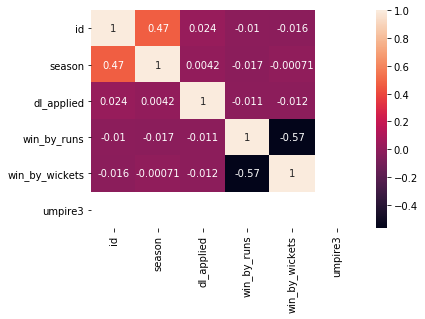

In [17]:
sns.heatmap(df_matches.corr(),annot=True)

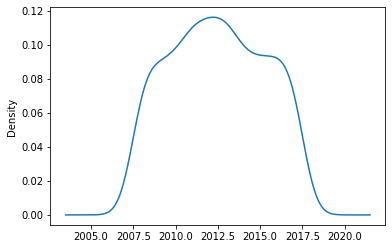

In [18]:
df_matches['season'].plot(kind="kde")

In [19]:
df_deliveries.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


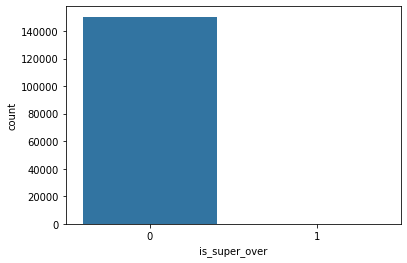

In [20]:
sns.countplot(df_deliveries['is_super_over'])

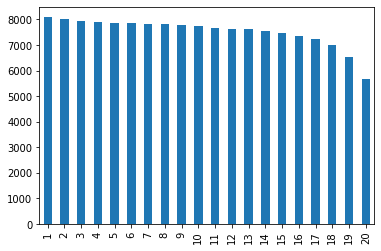

In [21]:
df_deliveries['over'].value_counts().plot(kind="bar")



Text(0.5, 1.0, 'Number of total runs in Different Seasons')

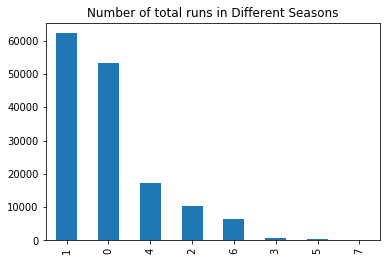

In [22]:
df_deliveries['total_runs'].value_counts().plot(kind="bar")
plt.title('Number of total runs in Different Seasons')

Text(0.5, 1.0, 'Wide Runs Scored In Matches')

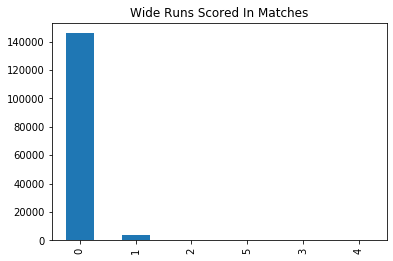

In [23]:
df_deliveries['wide_runs'].value_counts().plot(kind="bar")
plt.title("Wide Runs Scored In Matches")

In [24]:
df_deliveries.corr()['total_runs'].sort_values(ascending=False)

total_runs       1.000000
batsman_runs     0.975809
over             0.088896
extra_runs       0.078085
wide_runs        0.047354
noball_runs      0.043722
bye_runs         0.037402
legbye_runs      0.037322
is_super_over    0.012377
penalty_runs     0.010843
ball             0.008086
match_id         0.004366
inning          -0.005680
Name: total_runs, dtype: float64

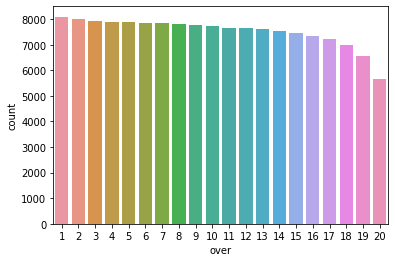

In [25]:
df_deliveries['over'].value_counts()
sns.countplot(df_deliveries['over'])

In [26]:
df_deliveries['noball_runs'].value_counts()

0    149842
1       602
2         9
5         6
3         1
Name: noball_runs, dtype: int64